# Assignment 8
## Tyler Baker
### Assignment Description
In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.
The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### The Data
I have chose to work with UFO sightings data. The data is from here: https://data.world/ck30/ufo-data-nuforc
Since the government has admitted the existence of UFOs the subject has been a very fun and interesting topic of discussion with my wife and friends. Let's see what we can find out.

In [4]:
ufo_df = pd.read_csv("https://raw.githubusercontent.com/tylerbaker01/datasets/main/ufo_data_nuforc%20(1).csv")
print(ufo_df.head())

     posted      date   time                       city state     shape  \
0  11/15/21  11/14/21  20:33                West Jordan    UT     Light   
1  11/15/21  11/13/21  19:45                      Hemet    CA     Light   
2  11/15/21  11/13/21  16:34                    Dunedin    FL     Flash   
3  11/15/21  11/13/21  16:00  Yonkers (Westchester Co.)    NY     Light   
4  11/15/21  11/12/21  20:15                 West Hills    CA  Fireball   

          duration                                            summary  
0            5 min  flashing green light zig zagging across the sk...  
1        3 minutes  Amber/Orange sphere witness at evening outdoor...  
2        7 seconds       Plusating White Light coming back from Beach  
3  Several seconds  Fast moving, small, bright green light sped ac...  
4       10 minutes  Multiple fast traveling fireballs in the night...  


### Data Exploration
Here we will gather summary statistics. Look at for NAs, if there are any then we will decide how to handle them.

In [5]:
print(ufo_df["posted"].isna().sum())
print(ufo_df["date"].isna().sum())
print(ufo_df["time"].isna().sum())
print(ufo_df["city"].isna().sum())
print(ufo_df["state"].isna().sum())
print(ufo_df["shape"].isna().sum())
print(ufo_df["duration"].isna().sum())
print(ufo_df["summary"].isna().sum())

0
0
0
0
0
0
0
0


There we have it. There is no missing data that we need to worry about.
Now, we look at summary statistics.

In [6]:
ufo_df.describe()

,posted,date,time,city,state,shape,duration,summary
count,111774,111774,111774,111774,111774,111774,111774,111774
unique,607,13211,1431,20109,50,44,10957,111198
top,6/25/20,11/7/15,22:00,Phoenix,CA,Light,5 minutes,((NUFORC Note: No information provided by witn...
freq,1450,272,6373,688,14074,24039,7534,29


Here we see that the most popular time for seeing a UFO is 10PM. Phoenix is the city that sees the most UFOs and California is the state that sees the most UFOs.

I think we need to wrangle the data before we look more into the summary statistics. Specifically, I want to change the time data to just hours. I will do this by flooring the column. I think we will need to also change the duration column. I would like to try to reduce the amount of unique values. I'm thinking hours, minutes, seconds.

In [7]:
ufo_hour = ufo_df[ufo_df.duration.str.contains("hour")]
ufo_min = ufo_df[ufo_df.duration.str.contains("min")]
ufo_sec = ufo_df[ufo_df.duration.str.contains("sec")]

In [8]:
ufo_hour.duration = "hours"
ufo_min.duration = "minutes"
ufo_sec.duration = "seconds"

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


I have now turned duration into either the option of hours long, minutes long, or seconds long. Anything that did not fit into the category will be dropped such as values like "unkown" or "currently happening". All that is left is to combine the new dfs.

In [9]:
ufo_better = pd.concat([ufo_hour, ufo_min, ufo_sec])
print(ufo_better.head())

      posted      date   time      city state     shape duration  \
31  11/15/21   11/7/21  02:00   Holland    MI      Cone    hours   
32  11/15/21   11/6/21  22:15    Albany    OR     Light    hours   
47  11/15/21   11/4/21  19:00  St. Paul    NE  Triangle    hours   
51  11/15/21   11/2/21  17:00   Trenton    NJ    Circle    hours   
68  11/15/21  10/29/21  22:00    Edison    NJ  Changing    hours   

                                              summary  
31  Hi I'm ((name deleted)) 28 from holland I have...  
32                   Red flashing lights above Albany  
47  At dusk large triangle shaped object holding s...  
51  Several have been just sitting and I think the...  
68  now this is not a joke for at about 10 o'clock...  


In [10]:
ufo_better['time'] = ufo_better['time'].str[:2]
ufo_better['time'] = pd.to_numeric(ufo_better['time'])

The column "shape" also has a lot of unique values. I think the best way to handle this is to only keep the top 5 or 10 most frequented shapes and drop the rest. This will allow us to make some interesting visualizations.

In [13]:
ufo_better["shape"].value_counts()

Light        21454
Circle       10766
Triangle      9496
Fireball      7759
Sphere        6946
Other         6834
Unknown       6818
Disk          5720
Oval          4418
Formation     3579
Cigar         2503
Changing      2492
Rectangle     1828
Flash         1777
Cylinder      1629
Diamond       1440
Chevron       1269
Teardrop       883
Egg            840
Cone           369
Cross          322
light           51
other           16
triangle        15
circle           7
Delta            5
sphere           4
cylinder         4
rectangle        3
Round            2
cigar            2
oval             2
diamond          2
fireball         1
flash            1
Flare            1
egg              1
changed          1
pyramid          1
Hexagon          1
changing         1
unknown          1
delta            1
Crescent         1
Name: shape, dtype: int64

Here we see that the top 5 most common instances are light, circle, triangle, fireball, and sphere. Now we will pull out all of the "light"s and "Light"s. Another thing we should be mindful of is that some of these shape names might actually be describing the same shape. For example, maybe in some areas the people will call the UFO cigar shaped, while in another area, while looking at the same UFO, this group calls it Cylinder shape. For the sake of this assignment I will not worry about these and just simply disregard them.

In [15]:
ufo_light = ufo_better[ufo_better["shape"].str.contains("light|Light")]
ufo_circle = ufo_better[ufo_better["shape"].str.contains("circle|Circle")]
ufo_triangle = ufo_better[ufo_better["shape"].str.contains("triangle|Triangle")]
ufo_fireball = ufo_better[ufo_better['shape'].str.contains("fireball|Fireball")]
ufo_sphere = ufo_better[ufo_better["shape"].str.contains("sphere|Sphere")]

In [16]:
ufo_light["shape"] = "light"
ufo_circle["shape"] = "circle"
ufo_triangle["shape"] = "triangle"
ufo_fireball["shape"] = "fireball"
ufo_sphere["shape"] = "sphere"

C:\Users\tyler\AppData\Local\Temp/ipykernel_17308/3547839748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufo_light["shape"] = "light"
C:\Users\tyler\AppData\Local\Temp/ipykernel_17308/3547839748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufo_circle["shape"] = "circle"
C:\Users\tyler\AppData\Local\Temp/ipykernel_17308/3547839748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [126]:
df_ufo = pd.concat([ufo_light,ufo_circle,ufo_triangle,ufo_fireball,ufo_sphere])

,time
count,56499.000000
mean,16.203437
std,7.539096
min,0.000000
25%,12.000000
50%,20.000000
75%,21.000000
max,23.000000


In [21]:
south = ['OK','TX','AR','LA','KY','TN','MS','AL','WV','MD','DE','VA','NC','SC','GA','FL']
northeast = ['ME','NH','VT','MA','NY','CT','RI','PA','NJ']
midwest = ['ND','SD','NE','KS','MN','IA','MO','WI','IL','IN','MI','OH']
west = ['WA','OR','CA','AK','HI','ID','NV','MT','WY','UT','AZ','CO','NM']

regions = {'OK':'south',
          'TX':'south',
          'AR':'south',
          'LA':'south',
          'KY':'south',
          'TN':'south',
          'MS':'south',
          'AL':'south',
          'WV':'south',
          'MD':'south',
          'DE':'south',
          'VA':'south',
          'NC':'south',
          'SC':'south',
          'GA':'south',
          'FL':'south',
          'ME':'northeast',
          'NH':'northeast',
          'VT':'northeast',
          'MA':'northeast',
          'NY':'northeast',
          'CT':'northeast',
          'RI':'northeast',
          'PA':'northeast',
          'NJ':'northeast',
          'ND':'midwest',
          'SD':'midwest',
          'NE':'midwest',
          'KS':'midwest',
          'MN':'midwest',
          'IA':'midwest',
          'MO':'midwest',
          'WI':'midwest',
          'IL':'midwest',
          'IN':'midwest',
          'MI':'midwest',
          'OH':'midwest',
          'WA':'west',
          'OR':'west',
          'CA':'west',
          'AK':'west',
          'HI':'west',
          'ID':'west',
          'NV':'west',
          'MT':'west',
          'WY':'west',
          'UT':'west',
          'AZ':'west',
          'CO':'west',
          'NM':'west'}
def get_region(state):
    return regions[state]

df_ufo['region'] = df_ufo['state'].apply(get_region)

### Visualization
Let's look at a few things.
1) Are certain UFO shapes more likely to show up in certain regions?


2) Are certain UFO shapes more likely to show up at certain hours?

#### Matplotlib

In [122]:
df_region =df_ufo.groupby(['region','shape'])['summary'].count()

region   shape   
midwest  circle      2018
         fireball    1578
         light       4423
         sphere      1350
Name: summary, dtype: int64

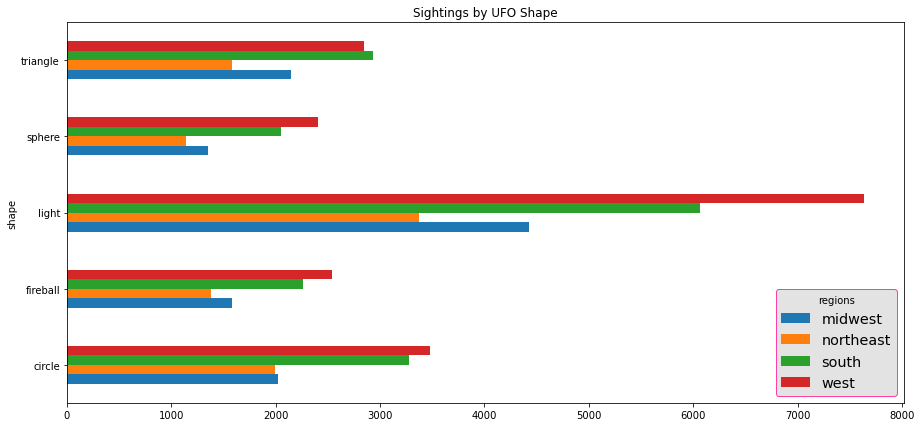

In [70]:
fig, ax = plt.subplots(figsize=(15,7))

df_ufo.groupby(['shape','region']).count()['summary'].unstack().plot(ax=ax, kind='barh', title='Sightings by UFO Shape', ylabel='amount of sightings')
ax.legend(loc=4,fontsize='x-large',edgecolor='deeppink', facecolor='gainsboro', title="regions")

The plot shows the amount of sightings for each region, given a particular UFO shape. From observing the graph we can notice that triangle shaped UFOs are their most popular sightings. This is the only region where the shape 'light' is not the most popular.

Text(0.5, 0, 'hour')

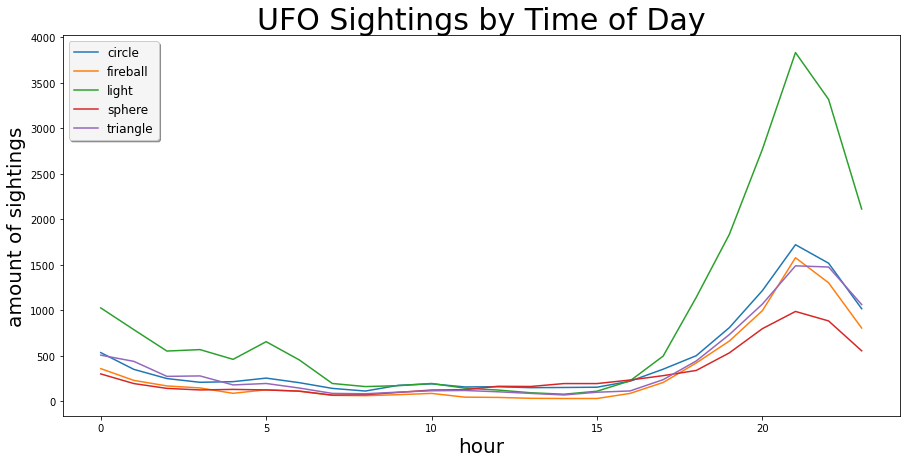

In [81]:
fig, ax = plt.subplots(figsize = (15,7))

df_ufo.groupby(['time', 'shape']).count()['summary'].unstack().plot(ax=ax, title="UFO sightings by Time of Day")
ax.legend(loc=0,fontsize='large',shadow=True,facecolor='whitesmoke')
ax.set_title('UFO Sightings by Time of Day', size=30)
ax.set_ylabel('amount of sightings', size=20)
ax.set_xlabel('hour', size=20)

This plot displays the number of UFO sightings for each hour in a day. It also shows how each UFO shape compares to each other. One thing in particular stands out. We can see that from noon until about 6PM that sphere and circle shaped UFOs are seen more than light shaped UFOs.

#### Seaborn

Text(0.5, 1.0, 'UFO Shape Sightings')

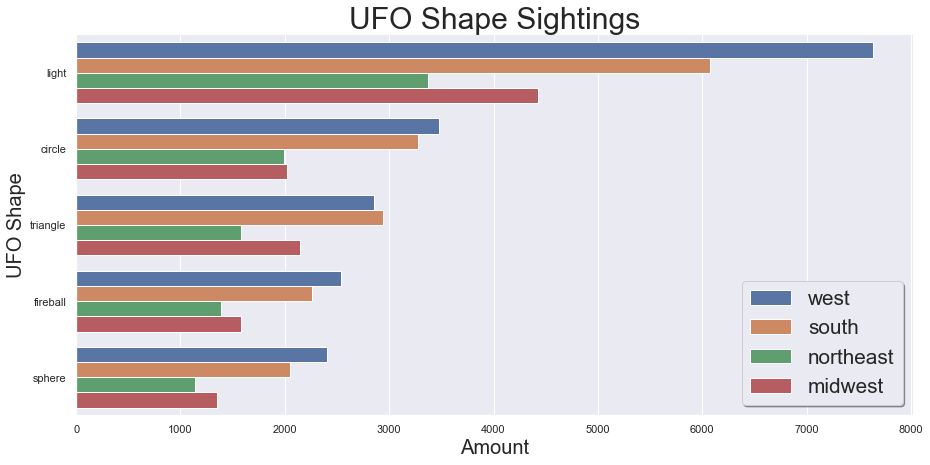

In [109]:
plt.figure(figsize =(15,7))
sns.countplot(data=df_ufo, y='shape', hue='region')
sns.despine()
plt.legend(fontsize='xx-large',shadow=True)
plt.xlabel("Amount", size=20)
plt.ylabel("UFO Shape", size =20)
plt.title("UFO Shape Sightings", size=30)

This is the same plot I created earlier but I used Seaborn this time. The plot is measuring the sightings for each UFO Shape and which region the sighting took place.

Text(0.5, 1.0, 'UFO Sightings Throughout a day')

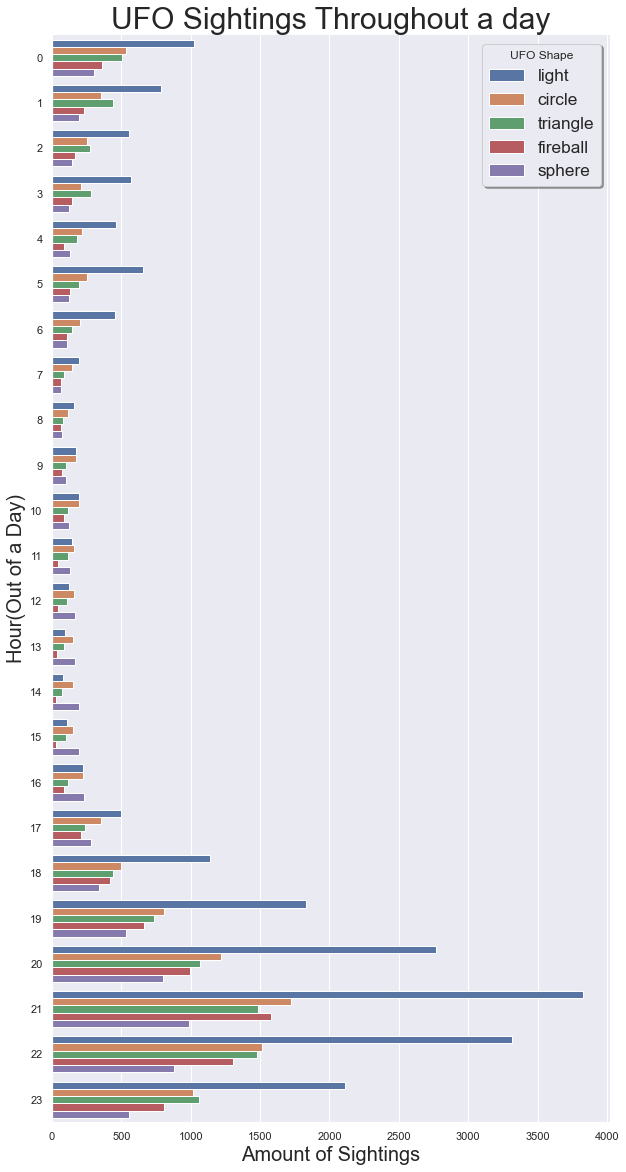

In [138]:
plt.figure(figsize=(10,20))
sns.countplot(data=df_ufo, y='time', hue='shape')
sns.despine()
plt.legend(title='UFO Shape', fontsize='x-large', shadow=True)
plt.ylabel("Hour(Out of a Day)", size=20)
plt.xlabel("Amount of Sightings", size=20)
plt.title("UFO Sightings Throughout a day", size=30)

I could not figure out how to do this as line graph. Again, this plot allows the viewer to pick an hour of the day, and see how many sightings have occured at that hour for a specific shape of UFO.

### Conclusions
#### The Plots
The difference in plotting between matplotlib and seaborn seem to be customization versus easiness. Matplotlib is not very intuitive, and the documentation is not very helpful. Specifically, the examples are very basic and few of them actually use dataframes. It felt dated. On the otherhand, Seaborn is much easier to use and to find documentation on. Since, graphing is not something I am strong at, I prefer to use something that is an intuitive and quick as possible. 
#### The Data
I found a few interesting bits of information. 
1) California experiences so many more UFO sightings than any other state. Why?

2) Why is the south the only region that witnesses more triangle shaped UFOs?

3) The best time to try to experience a UFO sighting is between 8PM and 11PM.